# Generating Results on Datasets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('../..')
from pytracking.analysis.plot_results import plot_results, print_results, print_per_sequence_results
from pytracking.evaluation import Tracker, get_dataset, trackerlist

## Plots for OTB, NFS and UAV

100%|██████████| 100/100 [00:01<00:00, 72.76it/s]


Computed results over 88 / 100 sequences

Plotting results over 88 / 100 sequences

Generating plots for: OTB
saved in /hdd/projects/pytracking2/pytracking/pytracking/result_plots/OTB/success_plot.pdf
saved in /hdd/projects/pytracking2/pytracking/pytracking/result_plots/OTB/precision_plot.pdf


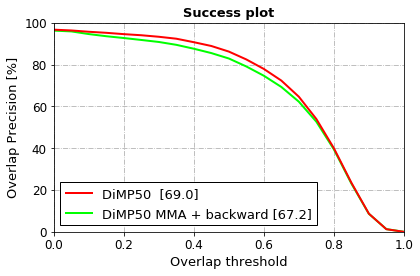

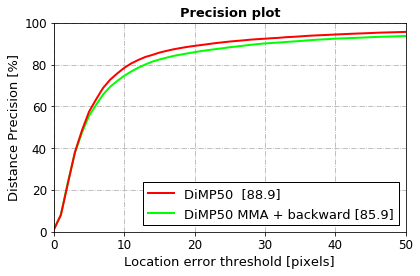

TypeError: savefig() missing 1 required positional argument: 'fname'

In [2]:
trackers = []
trackers.extend(trackerlist('dimp', 'dimp50', None, 'DiMP50 MMA + backward'))
trackers.extend(trackerlist('dimp', 'dimp50', None, 'DiMP50 '))

dataset = get_dataset('otb')
plot_results(trackers, dataset, 'OTB', merge_results=False, plot_types=('success', 'prec'), 
             skip_missing_seq=True, force_evaluation=True, exclude_invalid_frames=False, folder=['47-nos','base'])
plt.savefig()

## Plots for LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('lasot')
plot_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05)

## Tables for OTB, NFS, UAV and LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('otb')
print_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('nfs')
print_results(trackers, dataset, 'NFS', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('uav')
print_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('otb', 'nfs', 'uav')
print_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('lasot')
print_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

## Filtered per-sequence results

In [ ]:
# Print per sequence results for sequences where all trackers fail, i.e. all trackers have average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_max', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where at least one tracker fails, i.e. a tracker has average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_min', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where the trackers have differing behavior.
# i.e. average overlap in percentage for different trackers on a sequence differ by at least 40.0
filter_criteria = {'mode': 'delta_ao', 'threshold': 40.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for all sequences
filter_criteria = None
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)